<a href="https://colab.research.google.com/github/hyeryeong1026/hyeryeong_project/blob/main/0512.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!git clone https://github.com/hyeshik/colab-biolab.git
!cd colab-biolab && bash tools/setup.sh
exec(open('colab-biolab/tools/activate_conda.py').read())

Cloning into 'colab-biolab'...
remote: Enumerating objects: 76, done.
remote: Counting objects: 100% (76/76), done.
remote: Compressing objects: 100% (47/47), done.
remote: Total 76 (delta 26), reused 59 (delta 15), pack-reused 0 (from 0)
Receiving objects: 100% (76/76), 318.16 KiB | 3.18 MiB/s, done.
Resolving deltas: 100% (26/26), done.
./
./root/
./root/.condarc
./root/.bashrc.biolab
./root/.tmux.conf
./root/.profile
./root/.bin.priority/
./root/.bin.priority/pip
./root/.bin.priority/pip2
./root/.bin.priority/pip3
./root/.vimrc
--2025-05-13 02:49:39--  https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.191.158, 104.16.32.241, 2606:4700::6810:bf9e, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.191.158|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 155472915 (148M) [application/octet-stream]
Saving to: ‘miniconda3.sh’

miniconda3.sh       100%[===================>] 

In [28]:
!ls -al /content/drive/MyDrive/binfo1-datapack1/

total 7162852
-r-------- 1 root root 1370036258 Apr 27  2023 CLIP-35L33G.bam
-r-------- 1 root root    3118336 Apr 27  2023 CLIP-35L33G.bam.bai
-r-------- 1 root root       7113 May 11  2023 CLIP-let7g.bam
-r-------- 1 root root      14561 May 11  2023 CLIP-let7g-gene.pileup
-r-------- 1 root root    2685065 May 11  2023 CLIP-let7g.pileup
-r-------- 1 root root  883334756 Apr 27  2023 gencode.gtf
-r-------- 1 root root   24065406 Apr 27  2023 read-counts.txt
-r-------- 1 root root        751 Apr 27  2023 read-counts.txt.summary
-r-------- 1 root root 1003658801 Apr 27  2023 RNA-control.bam
-r-------- 1 root root    2276104 Apr 27  2023 RNA-control.bam.bai
-r-------- 1 root root 1260991122 Apr 27  2023 RNA-siLin28a.bam
-r-------- 1 root root    2710744 Apr 27  2023 RNA-siLin28a.bam.bai
-r-------- 1 root root  981684502 Apr 27  2023 RNA-siLuc.bam
-r-------- 1 root root    2606104 Apr 27  2023 RNA-siLuc.bam.bai
-r-------- 1 root root  737352902 Apr 27  2023 RPF-siLin28a.bam
-r-------- 1 r

In [30]:
!mkdir -p /content/drive/MyDrive/binfo1-work
%cd /content/drive/MyDrive/binfo1-work
!cp -f /content/drive/MyDrive/binfo1-datapack1/*.* /content/drive/MyDrive/binfo1-work/

/content/drive/MyDrive/binfo1-work


In [31]:
!conda install -y bedtools bioawk samtools

Channels:
 - conda-forge
 - bioconda
 - defaults
Platform: linux-64
Solving environment: / - done

# All requested packages already installed.



In [8]:
%cd /content/drive/MyDrive/binfo1-work/

/content/drive/MyDrive/binfo1-work


In [10]:
!grep '	start_codon	.*	+	.*transcript_support_level "1"' ../binfo1-work/gencode.gtf | \
 sed -e 's/	[^	]*transcript_id "\([^"]*\)".*$/	\1/g' > gencode-start.gtf
!head gencode-start.gtf

chr1	HAVANA	start_codon	4878137	4878139	.	+	0	ENSMUST00000134384.8
chr1	HAVANA	start_codon	4878137	4878139	.	+	0	ENSMUST00000027036.11
chr1	HAVANA	start_codon	4878137	4878139	.	+	0	ENSMUST00000150971.8
chr1	HAVANA	start_codon	4928137	4928139	.	+	0	ENSMUST00000081551.14
chr1	HAVANA	start_codon	5154674	5154676	.	+	0	ENSMUST00000044369.13
chr1	HAVANA	start_codon	5659272	5659274	.	+	0	ENSMUST00000160777.8
chr1	HAVANA	start_codon	5659272	5659274	.	+	0	ENSMUST00000027038.11
chr1	HAVANA	start_codon	6300227	6300229	.	+	0	ENSMUST00000027040.13
chr1	HAVANA	start_codon	6429555	6429557	.	+	0	ENSMUST00000133144.4
chr1	HAVANA	start_codon	6839122	6839124	.	+	0	ENSMUST00000140079.8


In [11]:
# 아래 공백 중 일부는 "탭(Tab)" 문자입니다. 입력하기 힘들 때는 텍스트 편집기에서 입력해서 복사&붙여넣기 하면 됩니다.
!grep '	exon	.*	+	' ../binfo1-work/gencode.gtf | \
 sed -e 's/	[^	]*transcript_id "\([^"]*\)".*$/	\1/g' > gencode-plusexon.gtf
!head gencode-plusexon.gtf

chr1	HAVANA	exon	3143476	3144545	.	+	.	ENSMUST00000193812.2
chr1	ENSEMBL	exon	3172239	3172348	.	+	.	ENSMUST00000082908.3
chr1	HAVANA	exon	3322980	3323459	.	+	.	ENSMUST00000192857.2
chr1	HAVANA	exon	3536810	3536910	.	+	.	ENSMUST00000161581.2
chr1	HAVANA	exon	3583628	3583776	.	+	.	ENSMUST00000161581.2
chr1	HAVANA	exon	3602018	3602943	.	+	.	ENSMUST00000192183.2
chr1	HAVANA	exon	3750378	3752011	.	+	.	ENSMUST00000193244.2
chr1	HAVANA	exon	3822233	3824583	.	+	.	ENSMUST00000194454.2
chr1	HAVANA	exon	4566774	4569601	.	+	.	ENSMUST00000193450.2
chr1	HAVANA	exon	4567697	4567877	.	+	.	ENSMUST00000194935.2


In [12]:
# 아래 공백 중 일부는 "탭(Tab)" 문자입니다. 입력하기 힘들 때는 텍스트 편집기에서 입력해서 복사&붙여넣기 하면 됩니다.
!bedtools intersect -a gencode-start.gtf -b gencode-plusexon.gtf -wa -wb | \
 awk -F'	' -v OFS='	' '$9 == $18 { print $10, $13-1, $14, $18, $4-1, $16; }' | \
 sort -k1,1 -k2,3n -k4,4 > gencode-exons-containing-startcodon.bed
!head gencode-exons-containing-startcodon.bed; tail gencode-exons-containing-startcodon.bed

chr1	4878010	4878205	ENSMUST00000134384.8	4878136	+
chr1	4878045	4878205	ENSMUST00000027036.11	4878136	+
chr1	4878052	4878205	ENSMUST00000150971.8	4878136	+
chr1	4928036	4928199	ENSMUST00000081551.14	4928136	+
chr1	5154639	5154786	ENSMUST00000044369.13	5154673	+
chr1	5659227	5659528	ENSMUST00000027038.11	5659271	+
chr1	5659257	5659528	ENSMUST00000160777.8	5659271	+
chr1	6300182	6300297	ENSMUST00000027040.13	6300226	+
chr1	6429441	6429738	ENSMUST00000133144.4	6429554	+
chr1	6839121	6839176	ENSMUST00000043578.13	6839121	+
chrY	80939672	80939804	ENSMUST00000185340.2	80939686	+
chrY	81470683	81470815	ENSMUST00000187135.2	81470697	+
chrY	82237903	82238035	ENSMUST00000185636.2	82237917	+
chrY	83043623	83043755	ENSMUST00000187165.2	83043637	+
chrY	84109956	84110088	ENSMUST00000185776.7	84109970	+
chrY	84759361	84759493	ENSMUST00000186110.2	84759375	+
chrY	86074448	86074580	ENSMUST00000188754.2	86074462	+
chrY	87129500	87129632	ENSMUST00000189543.7	87129514	+
chrY	87563647	87563779	ENSMUST0000

In [33]:
!(samtools view -H ../binfo1-datapack1/RPF-siLuc.bam; \
  samtools view -F20 ../binfo1-datapack1/RPF-siLuc.bam | \
  bioawk -c sam '{ if (length($seq) >= 25) print $0; }') | \
 samtools view -b -o filtered-RPF-siLuc.bam

In [34]:
!ls -al *RPF-siLuc.bam

-rw------- 1 root root  554373659 May 13 04:41 filtered-RPF-siLuc.bam
-rw------- 1 root root 1055123479 May 13 04:30 RPF-siLuc.bam


In [35]:
!bedtools genomecov -ibam filtered-RPF-siLuc.bam -bg -5 > fivepcounts-RPF-siLuc.bed
!head fivepcounts-RPF-siLuc.bed

chr1	3176534	3176535	1
chr1	3196256	3196257	1
chr1	3221526	3221527	1
chr1	3221542	3221543	2
chr1	3221545	3221546	3
chr1	3221546	3221547	2
chr1	3221548	3221550	1
chr1	3221571	3221572	1
chr1	3221897	3221898	1
chr1	3221994	3221995	1


In [36]:
!bedtools intersect -a fivepcounts-RPF-siLuc.bed -b gencode-exons-containing-startcodon.bed \
 -wa -wb -nonamecheck > fivepcounts-filtered-RPF-siLuc.txt
!head fivepcounts-filtered-RPF-siLuc.txt

chr1	4878048	4878049	1	chr1	4878010	4878205	ENSMUST00000134384.8	4878136	+
chr1	4878048	4878049	1	chr1	4878045	4878205	ENSMUST00000027036.11	4878136	+
chr1	4878077	4878078	1	chr1	4878010	4878205	ENSMUST00000134384.8	4878136	+
chr1	4878077	4878078	1	chr1	4878045	4878205	ENSMUST00000027036.11	4878136	+
chr1	4878077	4878078	1	chr1	4878052	4878205	ENSMUST00000150971.8	4878136	+
chr1	4878101	4878102	4	chr1	4878010	4878205	ENSMUST00000134384.8	4878136	+
chr1	4878101	4878102	4	chr1	4878045	4878205	ENSMUST00000027036.11	4878136	+
chr1	4878101	4878102	4	chr1	4878052	4878205	ENSMUST00000150971.8	4878136	+
chr1	4878103	4878104	1	chr1	4878010	4878205	ENSMUST00000134384.8	4878136	+
chr1	4878103	4878104	1	chr1	4878045	4878205	ENSMUST00000027036.11	4878136	+


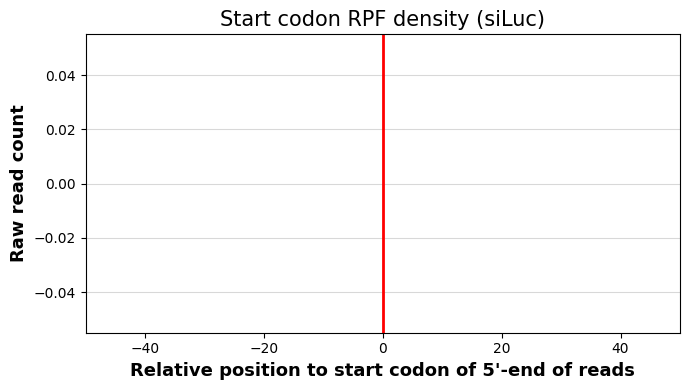

In [54]:
import pandas as pd
import matplotlib.pyplot as plt

# intersect 결과 불러오기
cols = ['read_chr', 'read_start', 'read_end', 'read_name', 'read_score', 'read_strand',
        'codon_chr', 'codon_start', 'codon_end', 'codon_strand']
df = pd.read_csv('fivepcounts-filtered-RPF-siLuc.txt', sep='\t', header=None, names=cols)

# 숫자형으로 변환
df['read_start'] = pd.to_numeric(df['read_start'], errors='coerce')
df['read_end'] = pd.to_numeric(df['read_end'], errors='coerce')
df['codon_start'] = pd.to_numeric(df['codon_start'], errors='coerce')
df['codon_end'] = pd.to_numeric(df['codon_end'], errors='coerce')

# 거리 계산 함수
def get_distance(row):
    if row['codon_strand'] == '+':
        return row['read_start'] - row['codon_start']
    else:  # '-' strand: reverse direction
        return row['codon_end'] - row['read_end']

# 거리 계산 적용
df['distance'] = df.apply(get_distance, axis=1)

# -50 ~ +50 범위만 필터링
df = df[df['distance'].between(-50, 50)]

# 거리별 count
counts = df['distance'].value_counts().sort_index()
counts = counts.reindex(range(-50, 51), fill_value=0)  # 빠진 거리 채우기

# 그림 그리기
plt.figure(figsize=(7, 4))
plt.bar(counts.index, counts.values, width=1, color='black', edgecolor='none')
plt.axvline(0, color='red', linewidth=2)
plt.xlabel("Relative position to start codon of 5'-end of reads", fontsize=13, fontweight='bold')
plt.ylabel("Raw read count", fontsize=13, fontweight='bold')
plt.title("Start codon RPF density (siLuc)", fontsize=15)
plt.xlim(-50, 50)
plt.grid(axis='y', color='gray', alpha=0.3)
plt.tight_layout()
plt.show()
